##### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap

##### Reading in Data

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

##### Viewing data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Column Names that has numerical values

In [4]:
numerical_data_column_names = train_data.describe().columns
df = train_data[numerical_data_column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### Data Cleaning and Preparation

##### Filling in the null values

* As we can see from the information above we saw there were 3 columns that had null values

In [5]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0],inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)
train_data["GarageYrBlt"].fillna(train_data["YearBuilt"],inplace=True)

##### Recheck of the null values...ensuring that they were filled in

In [6]:
train_data[numerical_data_column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

##### Lets enconder the string values into numerical values so that the classifer can read in the data and replace the NaN values in the data...We do it for both test and train data

In [7]:
for col in train_data.columns:
    #print(col)
    if train_data[col].dtype == "O":
        train_data[col] = train_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
for col in test_data.columns:
    if test_data[col].dtype == "O":
        test_data[col] = test_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        test_data[col] = le.fit_transform(test_data[col])

##### Encoding the Objects with the Label Encoder
* Encode target labels with value between 0 and n_classes-1

In [8]:
categorical_data_column_names = set(train_data.columns) - set(train_data.describe().columns)
for name in categorical_data_column_names:
    le = preprocessing.LabelEncoder()
    x = train_data[name].values
    le.fit(x)
    train_data[name] = le.transform(x)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,68.267123,10516.828082,0.995890,0.993836,1.942466,2.777397,0.000685,...,2.758904,2.991096,3.504795,1.069178,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,22.356355,9981.264932,0.063996,0.249667,1.409156,0.707666,0.026171,...,40.177307,0.140703,1.082912,0.372102,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,60.000000,7553.500000,1.000000,1.000000,0.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,63.000000,9478.500000,1.000000,1.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,1.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,1.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


### Handling Outliers
* There was one outlier that did not make sense which was the LotArea that had a square footage of 215245.000000 square feet which is massive

In [11]:
upper_lim = train_data['LotArea'].quantile(.95)
lower_lim = train_data['LotArea'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
train_data[(train_data['LotArea'] < upper_lim) & (train_data['LotArea'] > lower_lim)]
Q1 = train_data['LotArea'].quantile(0.25)
Q3 = train_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
train_data = train_data[(train_data['LotArea'] < (Q3 + 1.5 * IQR)) & (train_data['LotArea'] > (Q1 - 1.5 * IQR))]
print(train_data.shape)

7553.5 11601.5 4048.0
(1391, 81)


##### I want to make sure that the SalePrice (Target Value) is saved prior to the feature selection stage and as well as the original dataframe so I can chose which features I want to engineer

In [12]:
sp = pd.DataFrame(train_data["SalePrice"])
train_data_df = pd.read_csv("data/train.csv")

### Feature Selection
* Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.

##### Spearman Method (Statistical)
* The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

<AxesSubplot:>

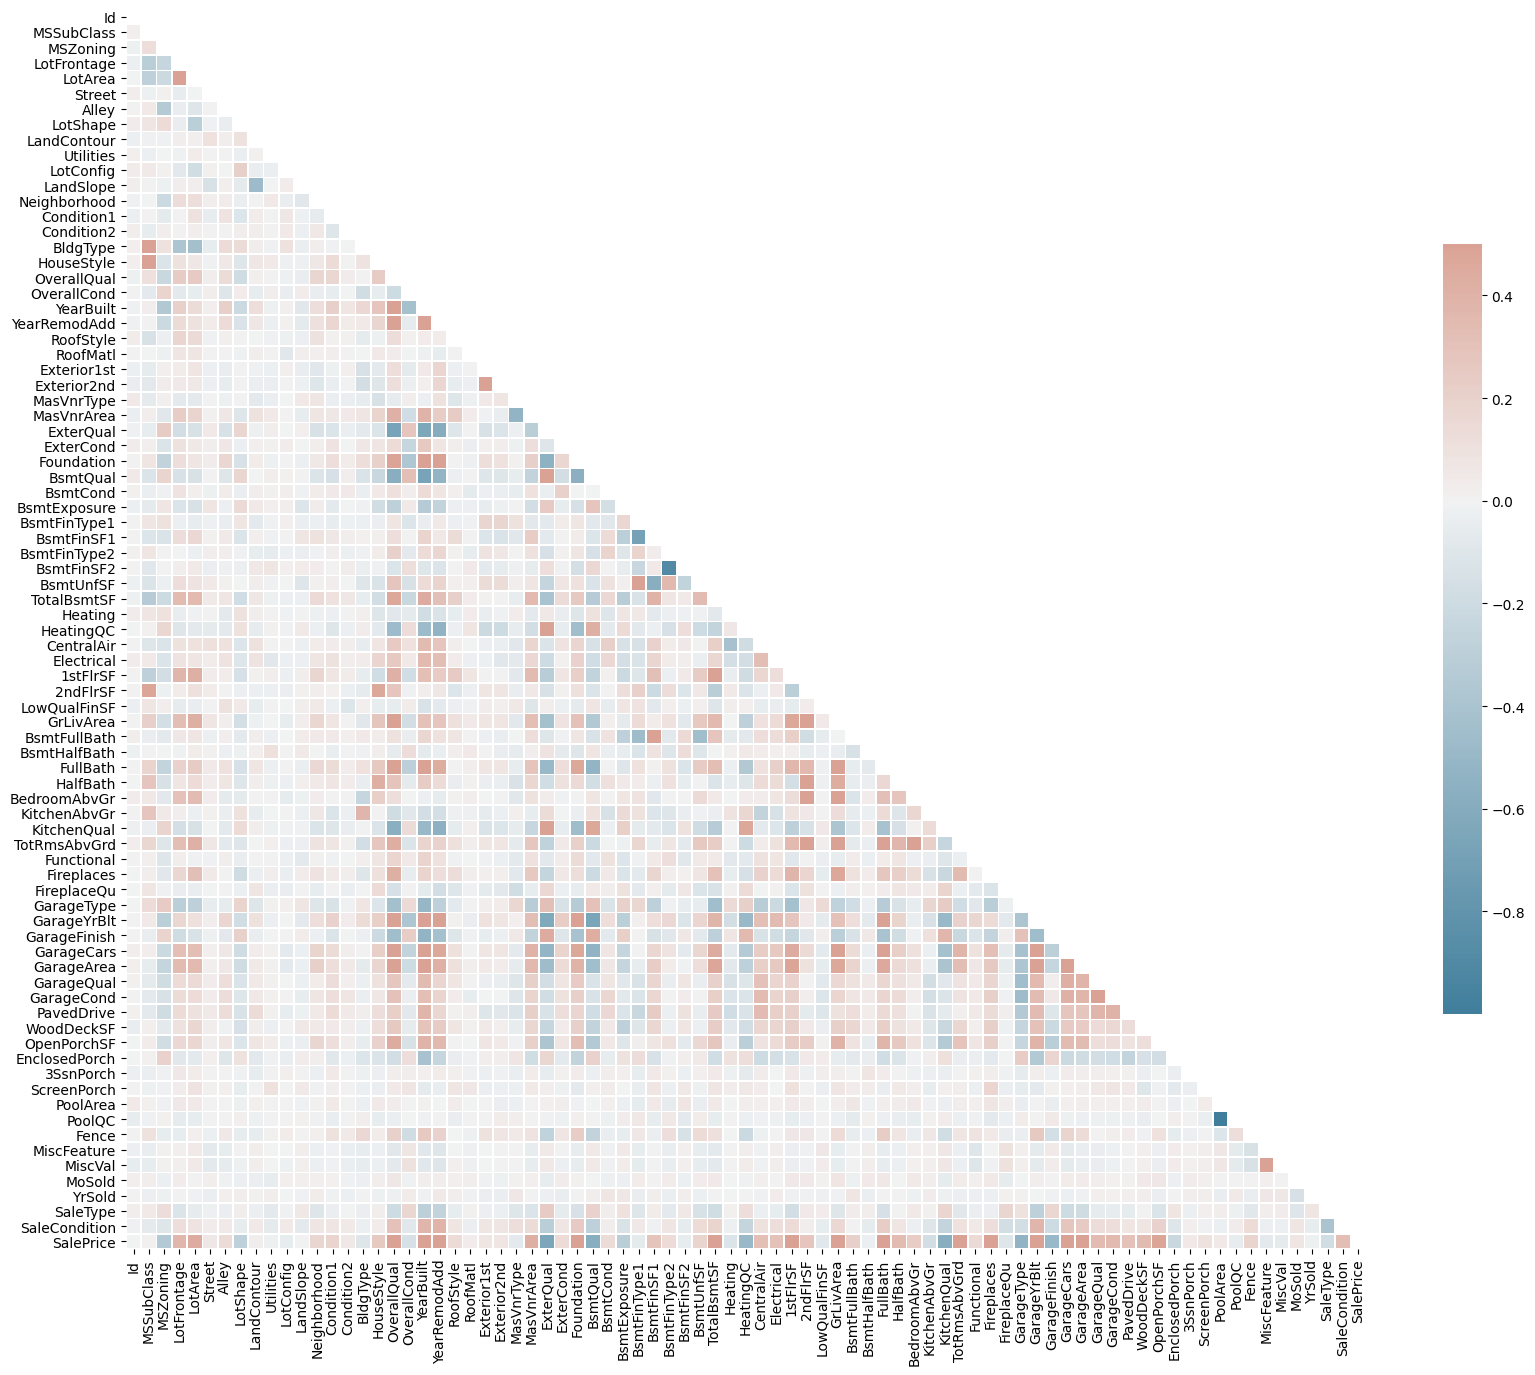

In [13]:
correlation_matrix = train_data.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Spearman Model best features

In [14]:
indecies = np.where(correlation_matrix['SalePrice'] > 0.3)
improved_features = correlation_matrix.iloc[indecies].drop('SalePrice')
improved_features['SalePrice']
new_features_spearman = list(improved_features.index)
new_features_spearman

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Foundation',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'SaleCondition']

##### Selecting feature based on Statistics (Scoring Function)
* Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure.
1. The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

2. It is converted to an F score then to a p-value.

In [15]:
X = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]

#Select the top features in the dataset
feature_selector = SelectKBest(f_regression,k=20)
feature_selector.fit(X, y)

f_scores = pd.DataFrame(list(zip(X.columns, feature_selector.scores_, feature_selector.pvalues_)),
                           columns=['ftr', 'score', 'pval']).dropna(axis=0)
f_scores = pd.DataFrame(f_scores)
f_scores.head()

,ftr,score,pval
0,MSSubClass,10.247615,1.399598e-03
1,MSZoning,50.718016,1.705808e-12
2,LotFrontage,241.217868,2.790973e-50
3,LotArea,315.881102,7.769502e-64
4,Street,3.638880,5.665096e-02


##### Scoring Function best features

In [16]:
kbest = np.asarray(X.columns)[feature_selector.get_support()]

In [17]:
kbest

array(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea'], dtype=object)

##### Selecting features based Random Forest Feature Importance
* The impurity-based feature importances.

* The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

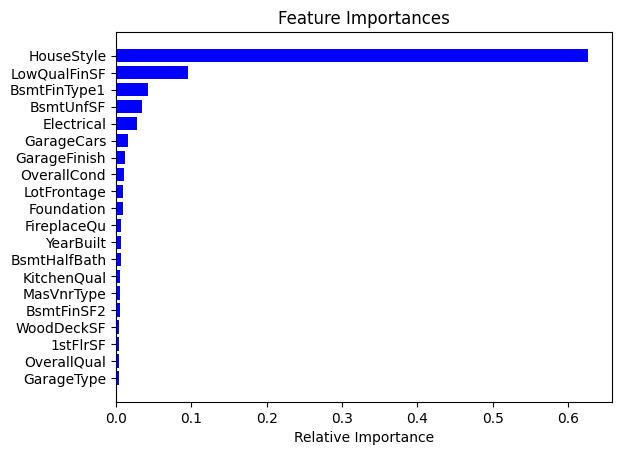

In [18]:
x = train_data.drop(["Id","SalePrice"],axis=1).values
y = train_data["SalePrice"]
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Random Forest best features

In [19]:
random_for_ftr = [features[i] for i in indices]
random_for_ftr

['GarageType',
 'OverallQual',
 '1stFlrSF',
 'WoodDeckSF',
 'BsmtFinSF2',
 'MasVnrType',
 'KitchenQual',
 'BsmtHalfBath',
 'YearBuilt',
 'FireplaceQu',
 'Foundation',
 'LotFrontage',
 'OverallCond',
 'GarageFinish',
 'GarageCars',
 'Electrical',
 'BsmtUnfSF',
 'BsmtFinType1',
 'LowQualFinSF',
 'HouseStyle']

##### The set of best features from the feature selection scoring functions that were used above

In [20]:
best = set(random_for_ftr).union(set(kbest)).union(set(new_features_spearman))

##### Taking a look at the column names

In [21]:
train_data[best].columns

Index(['KitchenQual', 'GarageFinish', 'HouseStyle', 'LotFrontage',
       'GarageType', 'OverallQual', 'GrLivArea', 'OverallCond', 'LotArea',
       'CentralAir', 'MasVnrType', 'BsmtHalfBath', 'BsmtQual', 'ExterQual',
       'OpenPorchSF', 'HalfBath', 'GarageArea', 'Foundation', 'FireplaceQu',
       'GarageCars', 'GarageYrBlt', 'GarageQual', 'FullBath', 'BsmtFinSF2',
       'Electrical', 'TotRmsAbvGrd', 'LowQualFinSF', 'MasVnrArea', 'YearBuilt',
       'BsmtFinType1', 'WoodDeckSF', 'TotalBsmtSF', 'YearRemodAdd',
       'HeatingQC', 'Fireplaces', '1stFlrSF', 'BsmtUnfSF', 'SaleCondition',
       'GarageCond'],
      dtype='object')

##### I want to see only the categorical column names where they intersect with the features that are chosen from the varible named "best"

In [22]:
feature = set(train_data[best].columns).intersection(set(categorical_data_column_names))
feature_test = set(test_data[best].columns).difference(set(test_data[best].describe().columns))
train_data = train_data[best]
train_data_old = train_data[best].join(sp)

In [23]:
train_data.head()

,KitchenQual,GarageFinish,HouseStyle,LotFrontage,GarageType,OverallQual,GrLivArea,OverallCond,LotArea,CentralAir,...,BsmtFinType1,WoodDeckSF,TotalBsmtSF,YearRemodAdd,HeatingQC,Fireplaces,1stFlrSF,BsmtUnfSF,SaleCondition,GarageCond
0,2,2,5,65.0,1,7,1710,5,8450,1,...,2,0,856,2003,0,0,856,150,4,5
1,3,2,2,80.0,1,6,1262,8,9600,1,...,0,298,1262,1976,0,1,1262,284,4,5
2,2,2,5,68.0,1,7,1786,5,11250,1,...,2,0,920,2002,0,1,920,434,4,5
3,2,3,5,60.0,5,7,1717,5,9550,1,...,0,0,756,1970,2,1,961,540,0,5
4,2,2,5,84.0,1,8,2198,5,14260,1,...,2,192,1145,2000,0,1,1145,490,4,5


In [24]:
train_data.shape

(1391, 39)

## Feature Engineering

##### Hot Encoding the categorical columns
* Encode categorical features as a one-hot numeric array.
* The reason why I want to encode the categorical values into Hot-Encoding is so that it would be easier for the model to read in the data

In [25]:
len(feature)

0

##### ^ Technical that is more than 10 features I engineered

In [26]:
for cat_name in feature:
    cat = pd.DataFrame(train_data_df[cat_name])
    enc = OneHotEncoder()
    enc.fit(cat)
    X_enc = enc.transform(cat).toarray()
    X_enc
    df = pd.DataFrame(X_enc,columns=enc.get_feature_names(cat.columns))
    train_data = train_data.join(df)
    train_data.drop(cat_name,axis=1,inplace=True)
train_data = train_data.join(sp)
train_data.head()

,KitchenQual,GarageFinish,HouseStyle,LotFrontage,GarageType,OverallQual,GrLivArea,OverallCond,LotArea,CentralAir,...,WoodDeckSF,TotalBsmtSF,YearRemodAdd,HeatingQC,Fireplaces,1stFlrSF,BsmtUnfSF,SaleCondition,GarageCond,SalePrice
0,2,2,5,65.0,1,7,1710,5,8450,1,...,0,856,2003,0,0,856,150,4,5,208500
1,3,2,2,80.0,1,6,1262,8,9600,1,...,298,1262,1976,0,1,1262,284,4,5,181500
2,2,2,5,68.0,1,7,1786,5,11250,1,...,0,920,2002,0,1,920,434,4,5,223500
3,2,3,5,60.0,5,7,1717,5,9550,1,...,0,756,1970,2,1,961,540,0,5,140000
4,2,2,5,84.0,1,8,2198,5,14260,1,...,192,1145,2000,0,1,1145,490,4,5,250000


##### Binning
* To improve the accuracy of the model...Notice that these transformations are only perform on numerical data

In [27]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
ftr = np.array(train_data["LotArea"]).reshape(-1,1)
est.fit(ftr)
Xt = est.transform(ftr)
train_data["LotArea"] = Xt

In [28]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
ftr = np.array(train_data["LotFrontage"]).reshape(-1,1)
est.fit(ftr)
Xt = est.transform(ftr)
train_data["LotFrontage"] = Xt

##### Log Transformation
* To improve the accuracy of the model...Notice that these transformations are only perform on numerical data

In [29]:
transformer = FunctionTransformer(np.log1p)
ftr = train_data["1stFlrSF"]
transformer.fit(ftr)
X = transformer.transform(ftr)
train_data["1stFlrSF"] = X

##### Transformation Mathmatically
* To improve the accuracy of the model. I would think that the overall quality of the home multiple by the living area of the home would be related to each. This is common sense.

In [30]:
x = train_data["GrLivArea"]*train_data["OverallQual"]
train_data["OVQualXLivArea"] = x

## Model Evaluation

#### Random Forrest Regressor
* Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.

In [31]:
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
x = train_data.drop("SalePrice",axis=1).values
y = train_data["SalePrice"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
rfr_improved = pd.DataFrame({"RFR_improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 16669.263684210524
Mean Squared Error: 664886348.1187203
Root Mean Squared Error: 25785.390206834574
R-squared Error: 0.8798768517720714


##### Support Vector Regressor

In [32]:
pipe = make_pipeline(StandardScaler(), SVR(kernel='linear', C=10000))
pipe.fit(x_train,y_train)
# pipe.fit(x,y)
y_pred = pipe.predict(x_test)
# y_pred = pipe.predict(test_data.values)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
svr_improved = pd.DataFrame({"SVR_improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 15477.1481293718
Mean Squared Error: 530725810.9607788
Root Mean Squared Error: 23037.487079991577
R-squared Error: 0.904115259038157


In [33]:
pipe = make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=11))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
knr_improved = pd.DataFrame({"KNR_Improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 19587.397129186604
Mean Squared Error: 859929728.6498874
Root Mean Squared Error: 29324.55845617948
R-squared Error: 0.8446389122705098


##### Models without any features engineered
* The models below are using train_data that have no features engineered besides the label encoder so that the models can actual read in the data

In [34]:
train_data_old

,KitchenQual,GarageFinish,HouseStyle,LotFrontage,GarageType,OverallQual,GrLivArea,OverallCond,LotArea,CentralAir,...,WoodDeckSF,TotalBsmtSF,YearRemodAdd,HeatingQC,Fireplaces,1stFlrSF,BsmtUnfSF,SaleCondition,GarageCond,SalePrice
0,2,2,5,65.0,1,7,1710,5,8450,1,...,0,856,2003,0,0,856,150,4,5,208500
1,3,2,2,80.0,1,6,1262,8,9600,1,...,298,1262,1976,0,1,1262,284,4,5,181500
2,2,2,5,68.0,1,7,1786,5,11250,1,...,0,920,2002,0,1,920,434,4,5,223500
3,2,3,5,60.0,5,7,1717,5,9550,1,...,0,756,1970,2,1,961,540,0,5,140000
4,2,2,5,84.0,1,8,2198,5,14260,1,...,192,1145,2000,0,1,1145,490,4,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,5,62.0,1,6,1647,5,7917,1,...,0,953,2000,0,1,953,953,4,5,175000
1456,3,3,2,85.0,1,6,2073,6,13175,1,...,349,1542,1988,4,2,2073,589,4,5,210000
1457,2,2,5,66.0,1,7,2340,9,9042,1,...,0,1152,2006,0,2,1188,877,4,5,266500
1458,2,3,2,68.0,1,5,1078,6,9717,1,...,366,1078,1996,2,0,1078,0,4,5,142125


##### Random Forest OLD

In [35]:
pipe = make_pipeline(RandomForestRegressor())
x = train_data_old.drop("SalePrice",axis=1).values
y = train_data_old["SalePrice"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
rfr_old =pd.DataFrame({"RFR_old":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 16744.46839712919
Mean Squared Error: 654629533.811573
Root Mean Squared Error: 25585.72910455305
R-squared Error: 0.8817299215919736


##### Support Vector Regression OLD

In [36]:
pipe = make_pipeline(StandardScaler(), SVR(kernel='linear'))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
svr_old = pd.DataFrame({"SVR_old":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])
svr_old

Mean Absolute Error: 48220.65518859508
Mean Squared Error: 4787894012.060566
Root Mean Squared Error: 69194.60970379533
R-squared Error: 0.13498464250664965


,SVR_old
mae,4.822066e+04
mse,4.787894e+09
rmse,6.919461e+04
rse,1.349846e-01


##### KNR OLD

In [37]:
pipe = make_pipeline(KNeighborsRegressor(n_neighbors=11))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared Error:', rse)
knr_old = pd.DataFrame({"KNR_old":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 28447.419312744674
Mean Squared Error: 1792865642.1132903
Root Mean Squared Error: 42342.24417899092
R-squared Error: 0.6760880022733146


##### Metrics of Models

In [38]:
df_improvements = pd.concat([rfr_improved,rfr_old,svr_improved,svr_old,knr_old,knr_improved],axis=1)
pd.set_option('float_format', '{:f}'.format)
df_improvements.transpose()

,mae,mse,rmse,rse
RFR_improvement,16669.263684,664886348.118720,25785.390207,0.879877
RFR_old,16744.468397,654629533.811573,25585.729105,0.881730
SVR_improvement,15477.148129,530725810.960779,23037.487080,0.904115
SVR_old,48220.655189,4787894012.060566,69194.609704,0.134985
KNR_old,28447.419313,1792865642.113290,42342.244179,0.676088
KNR_Improvement,19587.397129,859929728.649887,29324.558456,0.844639


##### Showing Improvement based on R-Squared Error

Text(0, 0.5, 'R-Squared Error')

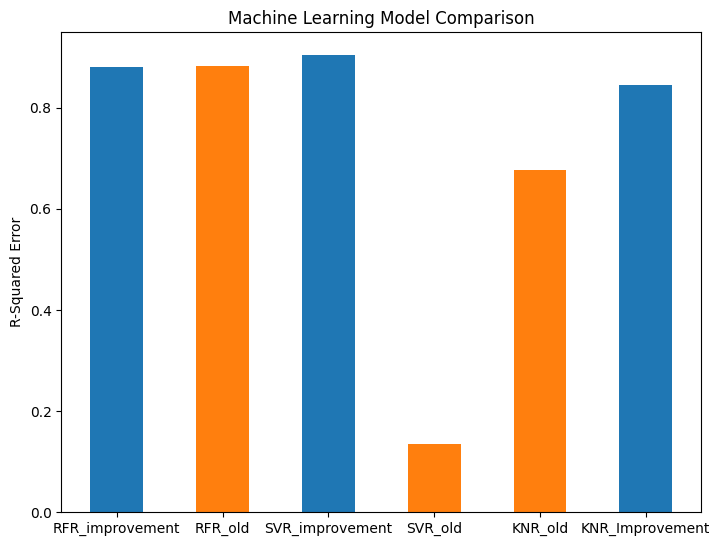

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
old = ["RFR_old","SVR_old","KNR_old"]
ax.bar(x = df_improvements.columns,height = df_improvements.transpose()["rse"],width = 0.5)
ax.bar(x = old,height = df_improvements[old].transpose()["rse"],width = 0.5)
ax.set_title('Machine Learning Model Comparison')
ax.set_ylabel('R-Squared Error')

##### Use Shapley summary plot to explain your model (Random Forrest Regressor)

In [40]:
scaler = StandardScaler()
clf = RandomForestRegressor()
x = train_data.drop("SalePrice",axis=1)
y = train_data["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 16359.294982057418
Mean Squared Error: 638860730.8409406
Root Mean Squared Error: 25275.694468024823
R-squared Error: 0.8845788269153839


##### Feature Importance

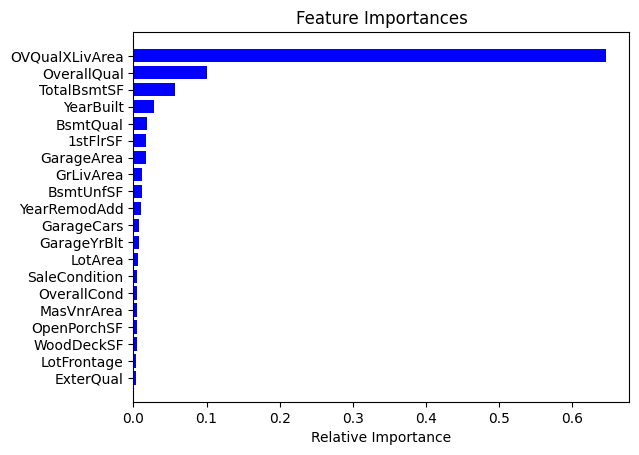

In [41]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-20:] 
features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### SHAP Model

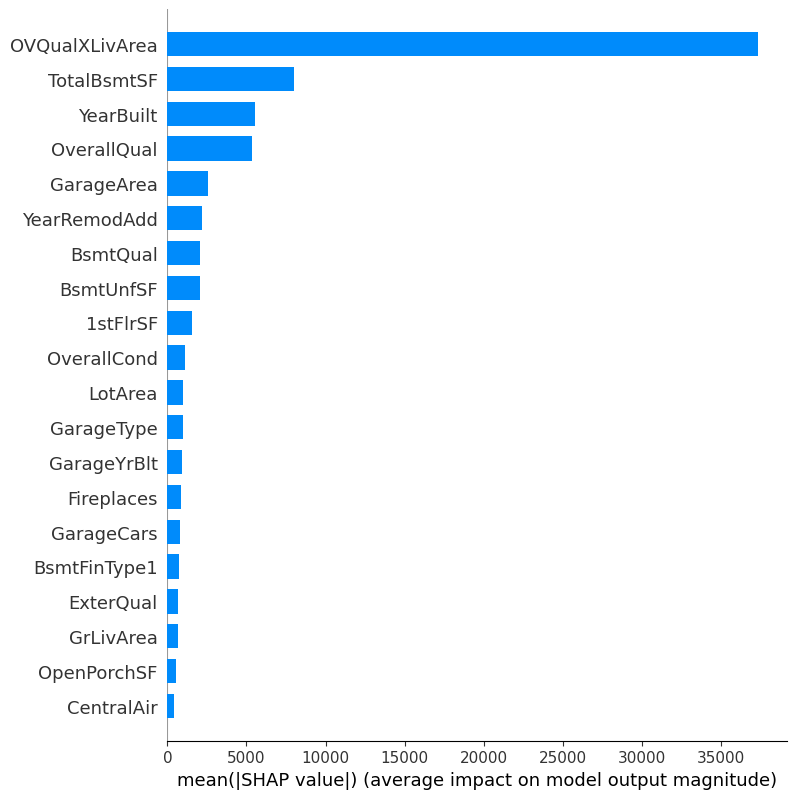

In [42]:
shap_values = shap.TreeExplainer(clf).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

##### SHAP Plot Summary

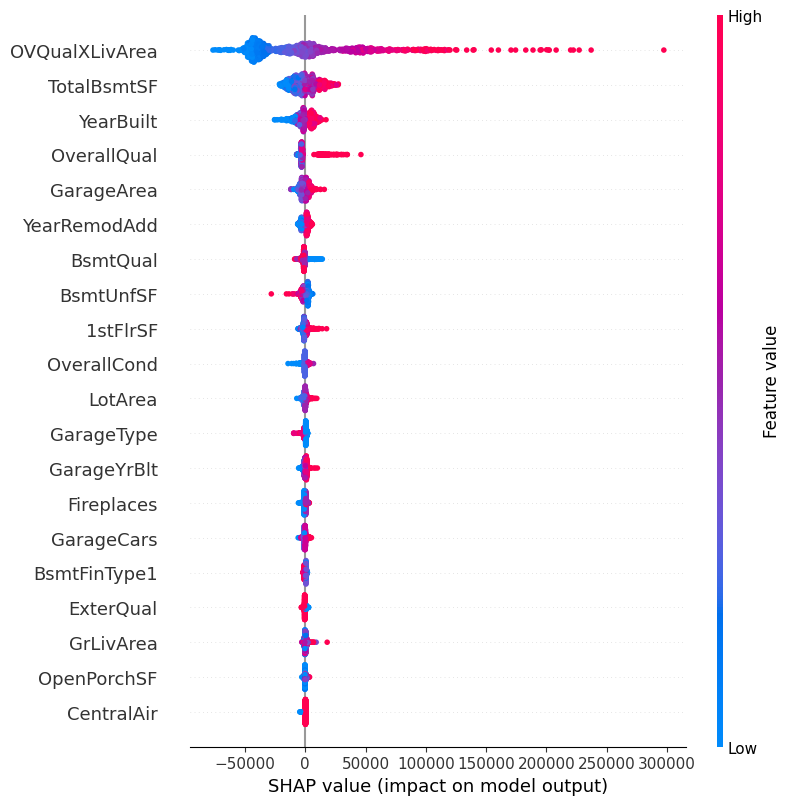

In [43]:
shap.summary_plot(shap_values, x_train)